In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.7)
# sees = tf.Session (config = tf.ConfigProto(gpu_options = gpu_options))

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

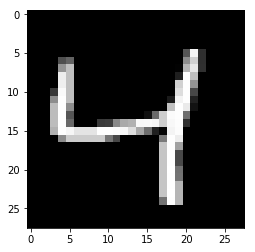

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
# 占位符
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [19]:
# Create the session
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.7)
sess = tf.Session (config = tf.ConfigProto(gpu_options = gpu_options))

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [21]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6920
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6867
Epoch: 1/20... Training loss: 0.6834
Epoch: 1/20... Training loss: 0.6798
Epoch: 1/20... Training loss: 0.6747
Epoch: 1/20... Training loss: 0.6693
Epoch: 1/20... Training loss: 0.6623
Epoch: 1/20... Training loss: 0.6539
Epoch: 1/20... Training loss: 0.6443
Epoch: 1/20... Training loss: 0.6337
Epoch: 1/20... Training loss: 0.6226
Epoch: 1/20... Training loss: 0.6083
Epoch: 1/20... Training loss: 0.5936
Epoch: 1/20... Training loss: 0.5786
Epoch: 1/20... Training loss: 0.5620
Epoch: 1/20... Training loss: 0.5460
Epoch: 1/20... Training loss: 0.5272
Epoch: 1/20... Training loss: 0.5075
Epoch: 1/20... Training loss: 0.4891
Epoch: 1/20... Training loss: 0.4745
Epoch: 1/20... Training loss: 0.4517
Epoch: 1/20... Training loss: 0.4407
Epoch: 1/20... Training loss: 0.4179
Epoch: 1/20... Training loss: 0.4105
Epoch: 1/20... Training loss: 0.3916
E

Epoch: 2/20... Training loss: 0.1725
Epoch: 2/20... Training loss: 0.1777
Epoch: 2/20... Training loss: 0.1804
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1776
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1778
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1753
Epoch: 2/20... Training loss: 0.1827
Epoch: 2/20... Training loss: 0.1746
Epoch: 2/20... Training loss: 0.1801
Epoch: 2/20... Training loss: 0.1773
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1811
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1770
Epoch: 2/20... Training loss: 0.1696
Epoch: 2/20... Training loss: 0.1758
Epoch: 2/20... Training loss: 0.1699
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1709
Epoch: 2/20... Training loss: 0.1723
Epoch: 2/20... Training loss: 0.1709
Epoch: 2/20... Training loss: 0.1675
E

Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1487
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1367
E

Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1198
E

Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1115
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1121
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1099
E

Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1012
E

Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0964
E

Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0945
E

Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.1006
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0897
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.1003
Epoch: 12/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0998
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0986
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

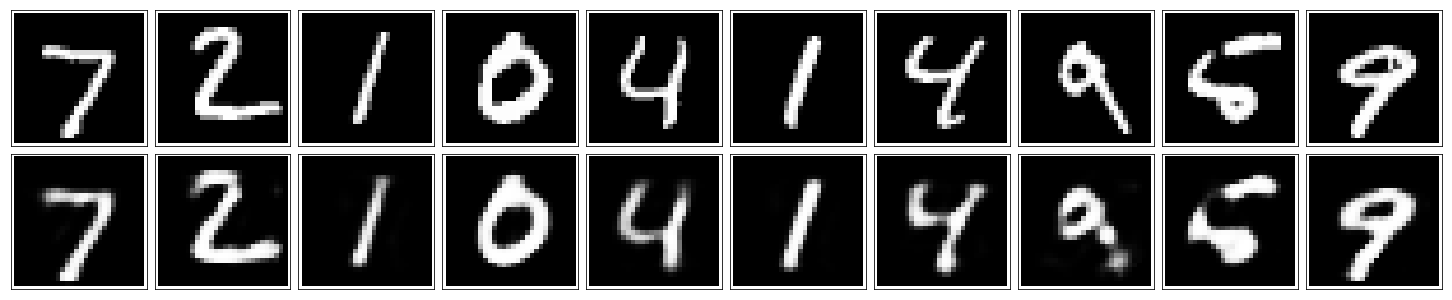

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [23]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.